In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
data=pd.read_csv('/kaggle/input/salary-k-nearsest-neighbour/salary.csv')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [26]:
data.shape

(32561, 5)

In [17]:
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [27]:
data.tail()

,age,education.num,capital.gain,hours.per.week,income
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K
32560,22,9,0,20,<=50K


In [28]:
missing_values = data.isna().sum()

In [29]:
missing_values

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

In [30]:
data['income'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)

In [31]:
data.head

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   education.num   32561 non-null  int64
 2   capital.gain    32561 non-null  int64
 3   hours.per.week  32561 non-null  int64
 4   income          32561 non-null  int64
dtypes: int64(5)
memory usage: 1.2 MB


EDA

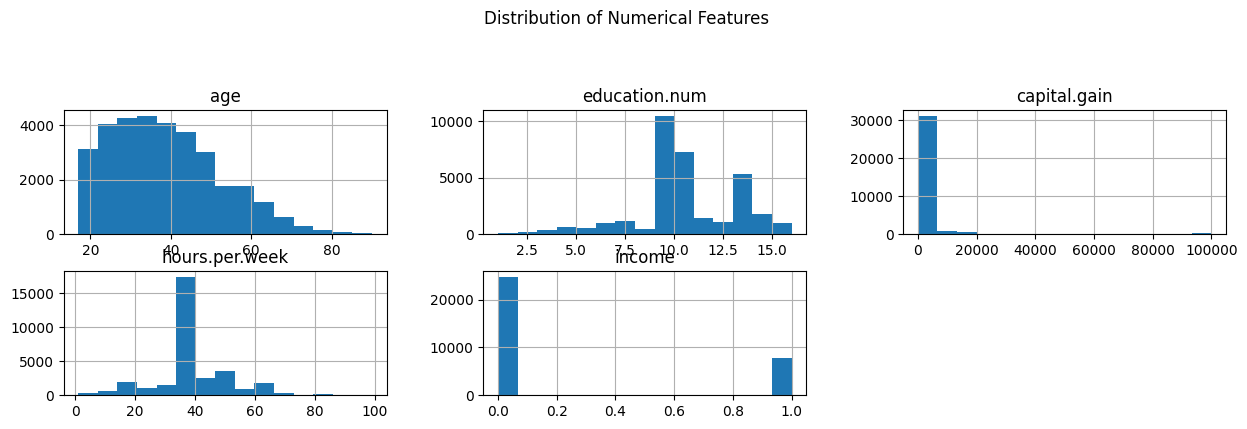

In [36]:
# Distribution of numerical features
numeric_features=data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_features].hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.suptitle("Distribution of Numerical Features")
plt.show()

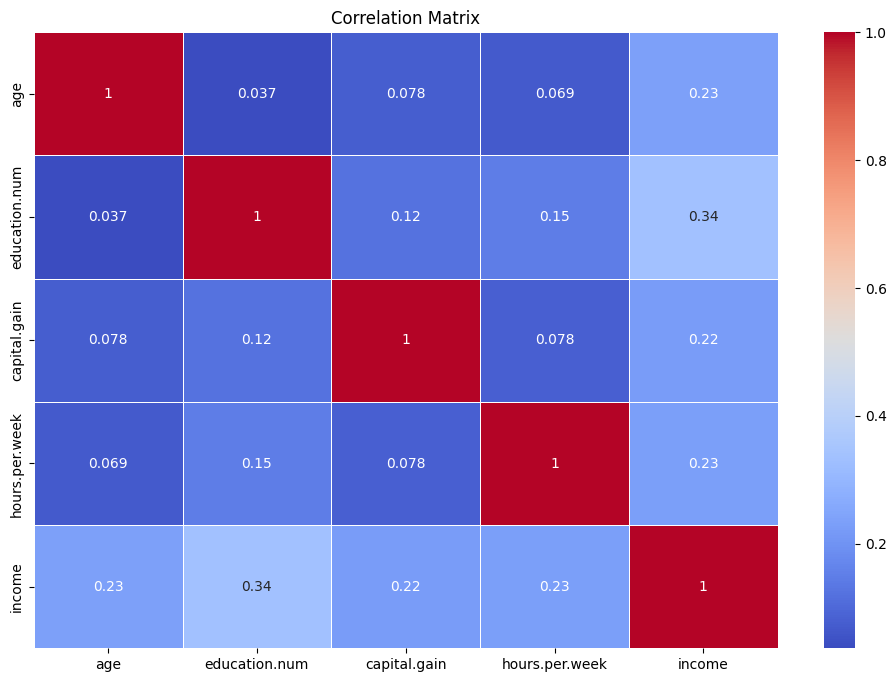

In [38]:
# Distribution of categorical variables 
plt.figure(figsize=(12,8))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

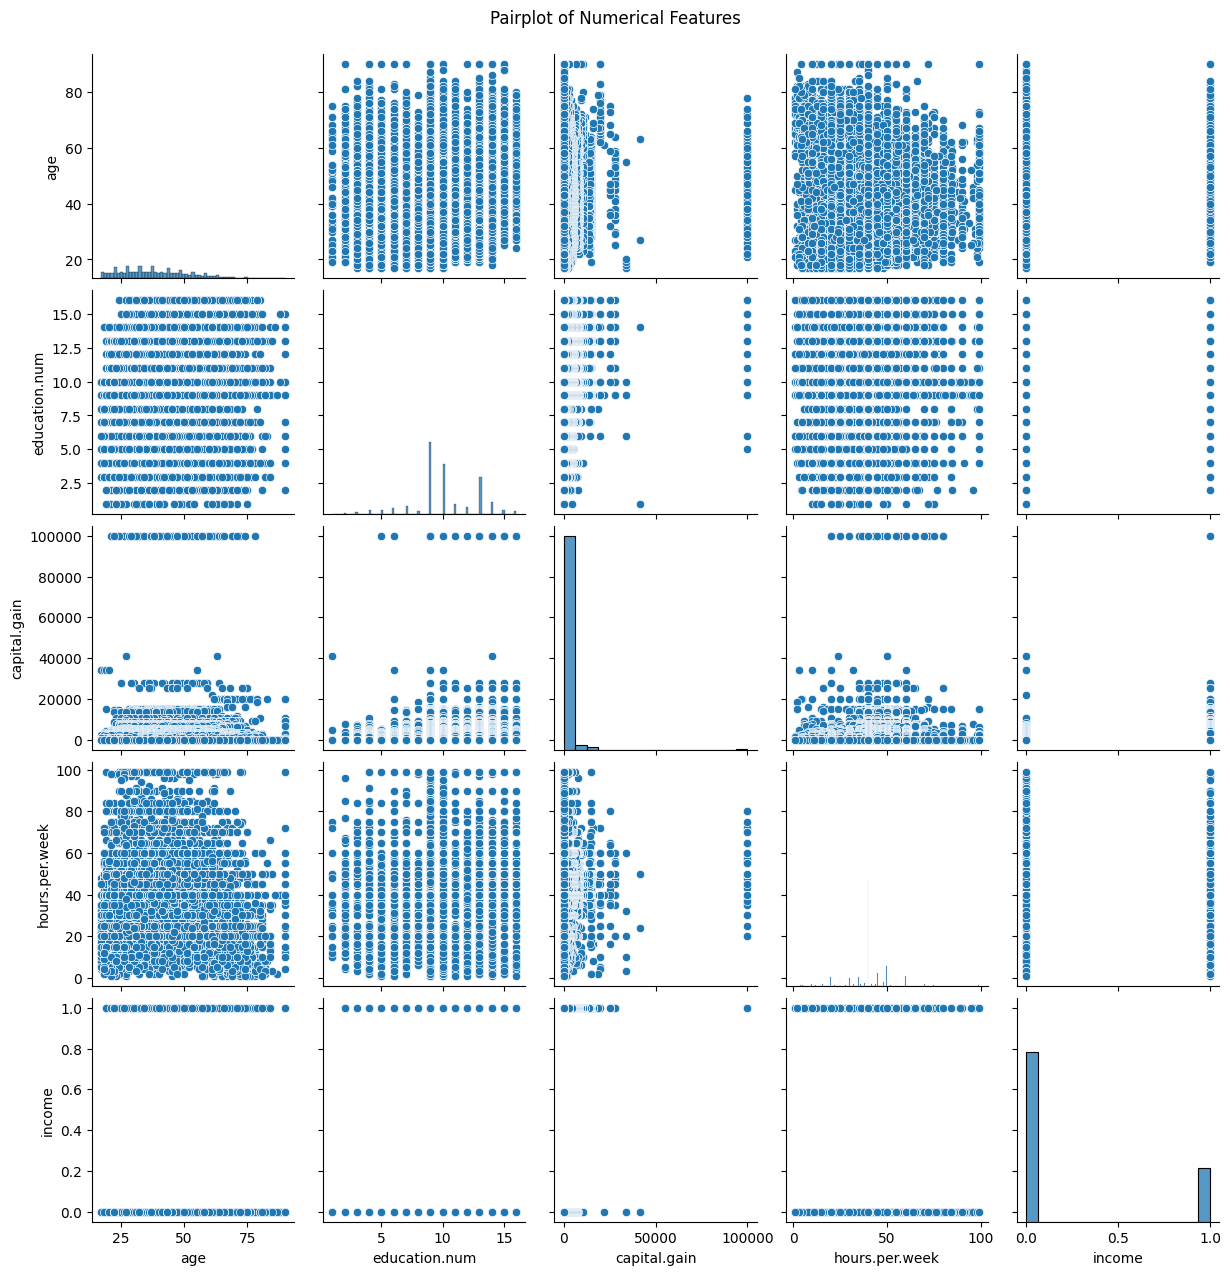

In [41]:
# Pairplot
categorical_features = data.select_dtypes(include=[object]).columns.tolist()
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(data[numeric_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

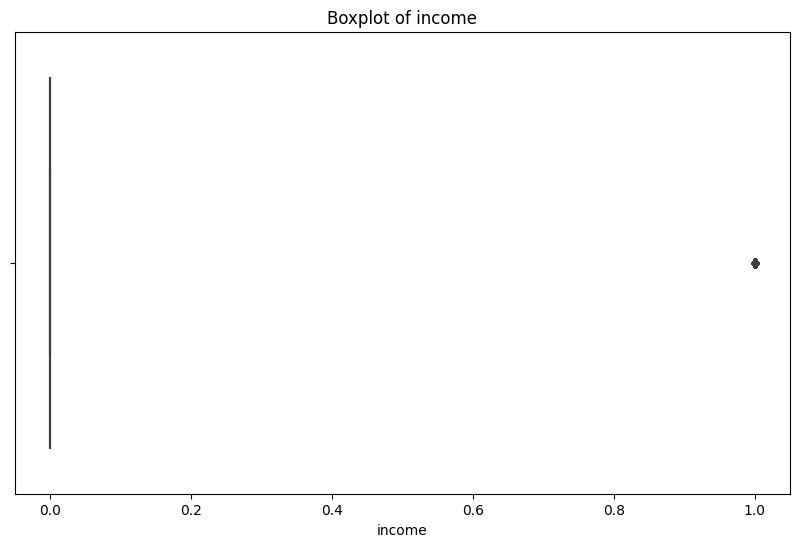

In [45]:
# check for outliers in boxplots
for col in numeric_features:
        plt.figure(figsize=(10, 6))
sns.boxplot(x=data[col])
plt.title(f"Boxplot of {col}")
plt.show()

In [48]:
# 1. Class imbalance check using bar plot for categorical columns
plt.figure(figsize=(12, 6))
for col in categorical_features:
    plt.subplot(1, len(categorical_features), categorical_features.index(col)+1)
    sns.countplot(x=col, data=data)
    plt.title(col)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>


Skewness of age: 0.5587176292398569
Outliers in age: [90, 82, 83, 81, 90, 80, 81, 90, 79, 90, 83, 79, 79, 80, 90, 90, 90, 90, 79, 90, 81, 90, 81, 79, 80, 90, 90, 79, 80, 81, 90, 88, 90, 90, 80, 90, 82, 79, 81, 83, 90, 79, 81, 90, 90, 80, 90, 79, 84, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 84, 80, 90, 79, 84, 90, 79, 90, 90, 82, 81, 90, 84, 79, 81, 82, 80, 90, 80, 84, 79, 90, 84, 90, 83, 79, 81, 80, 80, 79, 80, 90, 90, 80, 90, 81, 83, 82, 90, 90, 80, 80, 90, 80, 82, 85, 80, 79, 90, 81, 80, 79, 82, 88, 90, 82, 88, 84, 79, 86, 90, 82, 81, 90, 80, 81, 79, 84, 84, 79, 90, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 85, 82, 81]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


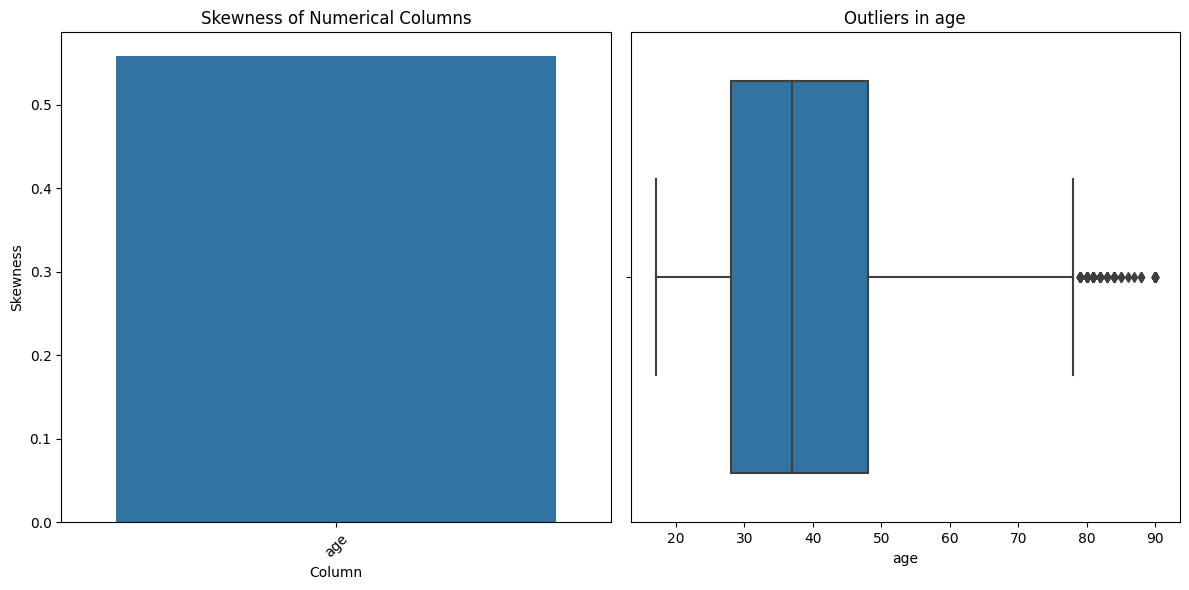


Skewness of education.num: -0.3116615096354675
Outliers in education.num: [4, 2, 3, 3, 3, 3, 4, 4, 4, 2, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 2, 1, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 2, 4, 4, 3, 4, 4, 4, 1, 4, 2, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 1, 4, 4, 4, 3, 4, 2, 4, 2, 2, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 2, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 2, 4, 3, 4, 2, 1, 4, 4, 3, 3, 2, 2, 2, 3, 3, 2, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 2, 1, 4, 4, 4, 4, 2, 2, 3, 3, 3, 4, 4, 3, 2, 4, 4, 4, 3, 4, 4, 4, 4, 4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 2, 2, 3, 3, 4, 3, 2, 4, 4, 3, 2, 2, 4, 3, 4, 1, 4, 1, 4, 4, 4, 3, 4, 3, 4, 4, 4, 2, 4, 3, 4, 3, 3, 3, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 2, 4, 4, 4, 1, 3, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 3, 4, 3, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 3, 3, 4, 4, 3, 3, 2, 4, 3, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 3, 3, 3, 4, 3, 4, 4, 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


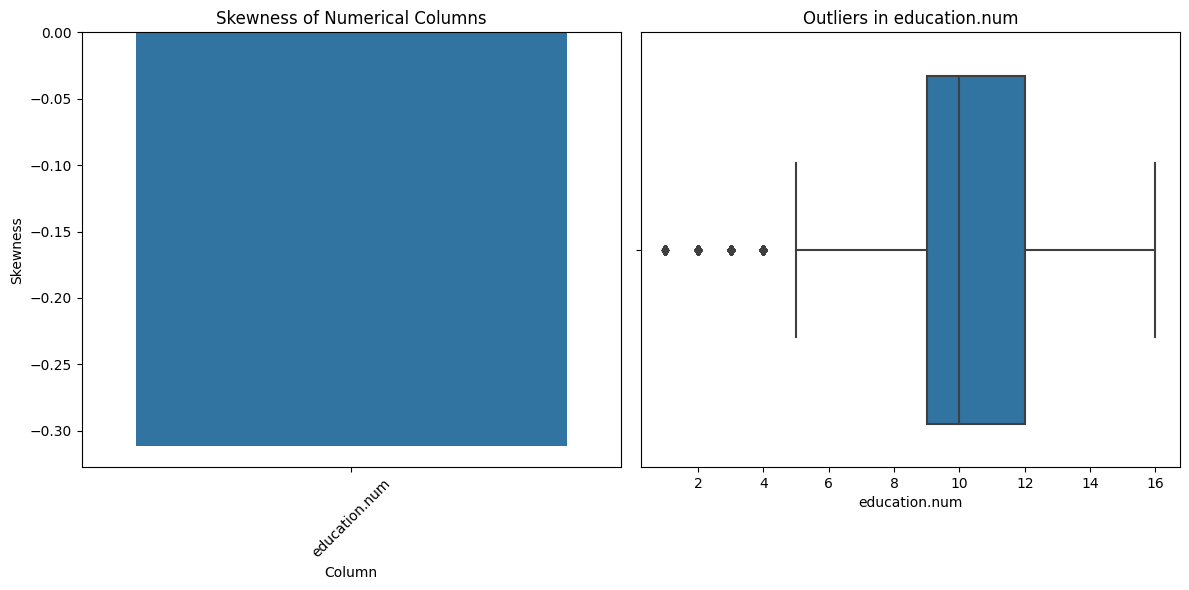


Skewness of capital.gain: 11.953296998194327
Outliers in capital.gain: [99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 999

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


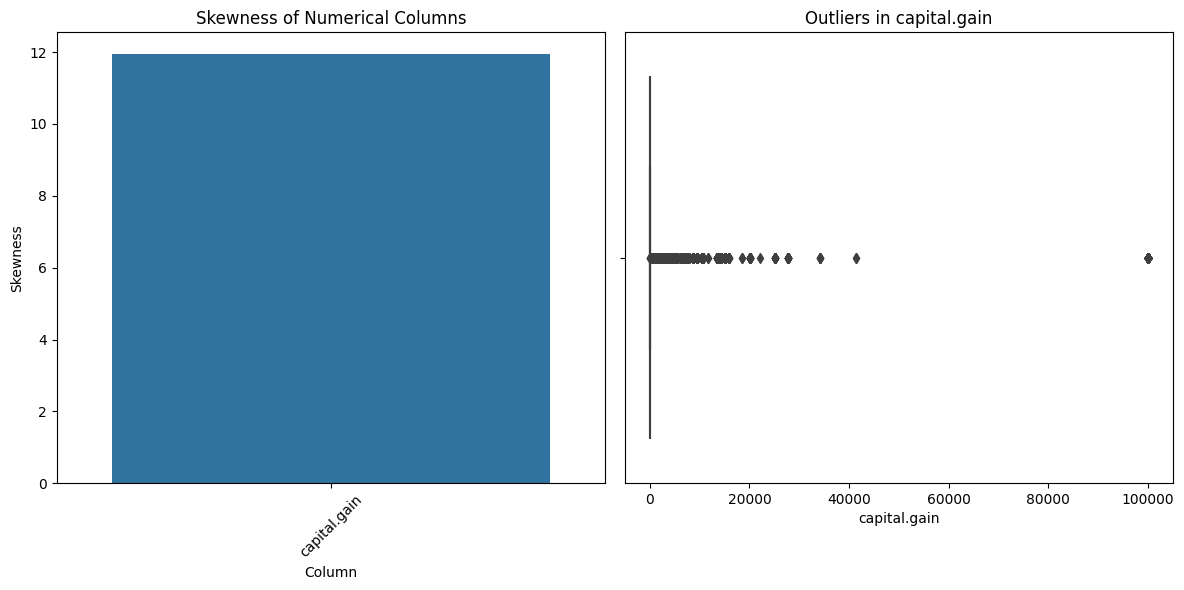


Skewness of hours.per.week: 0.22763204977477705
Outliers in hours.per.week: [18, 20, 60, 20, 55, 76, 25, 32, 32, 90, 60, 60, 60, 15, 70, 72, 70, 6, 70, 60, 60, 60, 55, 65, 60, 12, 65, 55, 80, 70, 55, 55, 67, 99, 60, 80, 99, 60, 55, 30, 55, 90, 20, 60, 75, 25, 6, 60, 55, 60, 60, 12, 20, 26, 25, 55, 65, 55, 60, 10, 84, 55, 60, 70, 60, 62, 8, 28, 30, 59, 10, 5, 25, 24, 18, 60, 84, 18, 12, 10, 25, 20, 72, 55, 60, 60, 20, 60, 20, 57, 55, 20, 10, 30, 30, 60, 55, 60, 30, 65, 65, 60, 56, 60, 60, 65, 80, 25, 55, 60, 60, 60, 70, 60, 60, 32, 60, 70, 60, 60, 60, 60, 20, 99, 30, 60, 60, 55, 24, 60, 98, 60, 60, 65, 60, 62, 15, 55, 30, 15, 55, 70, 60, 60, 20, 63, 60, 24, 99, 55, 60, 55, 18, 60, 60, 20, 60, 55, 20, 1, 60, 60, 65, 60, 60, 60, 80, 60, 55, 60, 60, 55, 60, 60, 70, 18, 55, 32, 55, 55, 55, 65, 55, 60, 20, 32, 60, 30, 55, 65, 60, 60, 32, 55, 56, 55, 60, 60, 15, 60, 60, 55, 99, 65, 60, 60, 70, 55, 55, 67, 70, 20, 55, 65, 70, 60, 55, 55, 55, 60, 60, 30, 60, 55, 70, 68, 55, 60, 60, 60, 60, 60,

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


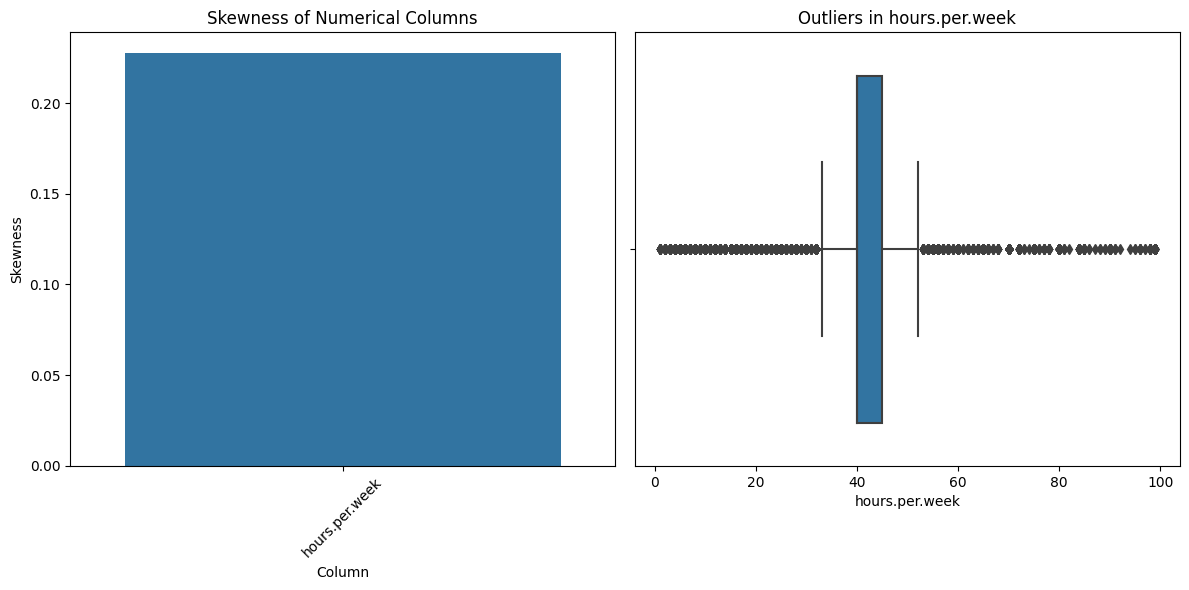


Skewness of income: 1.2123743878187738
Outliers in income: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


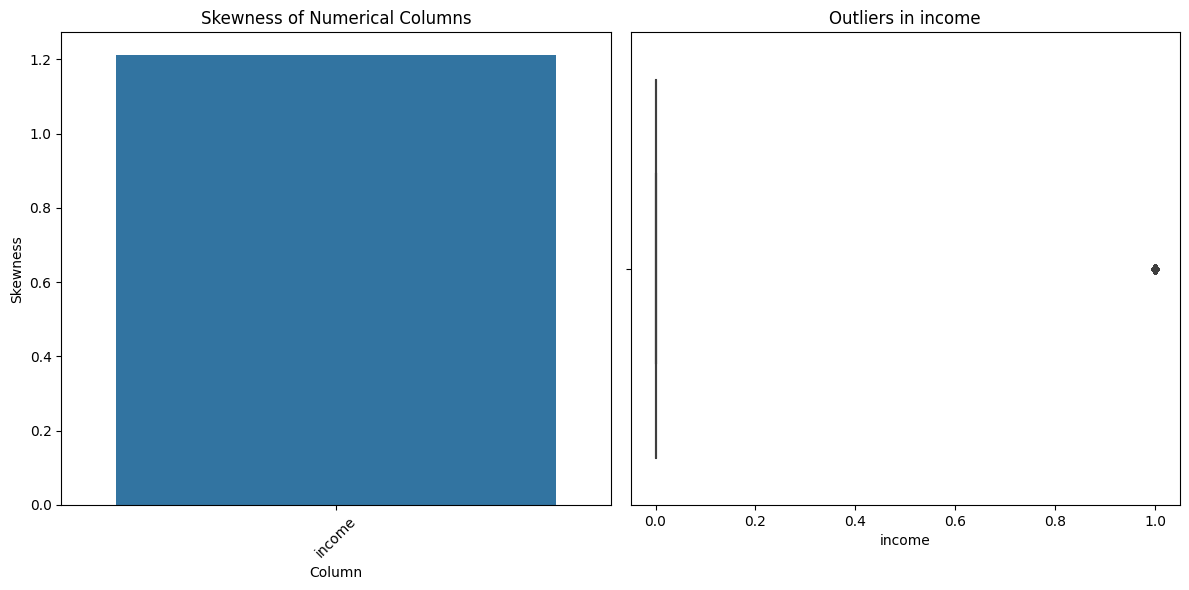

In [51]:
from scipy.stats import skew
# Skewness and outlier analysis for numerical columns
for col in numeric_features:
    # Skewness analysis
    skewness = skew(data[col])
    print(f"\nSkewness of {col}: {skewness}")

    # Outlier analysis (using IQR method)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))][col]
    print(f"Outliers in {col}: {outliers.tolist()}")

    # Visualize skewness and outliers
    plt.figure(figsize=(12, 6))

    # Skewness bar plot
    plt.subplot(1, 2, 1)
    sns.barplot(x=[col], y=[skewness])
    plt.title("Skewness of Numerical Columns")
    plt.xlabel("Column")
    plt.ylabel("Skewness")
    plt.xticks(rotation=45)

    # Outlier box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [53]:
# Lists to store variables with outliers and high skewness
variables_with_outliers = []
variables_with_high_skewness = []

# Skewness and outlier analysis for numerical columns
for col in numeric_features:
    # Skewness analysis
    skewness = skew(data[col])
    
    # Outlier analysis (using IQR method)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))][col]
    
    # Check for outliers and high skewness
    if len(outliers) > 0:
        variables_with_outliers.append(col)
    if abs(skewness) > 1:  # You can adjust this threshold based on your preference
        variables_with_high_skewness.append(col)

# Print the lists of variables with outliers and high skewness
print("Variables with outliers:", variables_with_outliers)
print("Variables with high skewness:", variables_with_high_skewness)


Variables with outliers: ['age', 'education.num', 'capital.gain', 'hours.per.week', 'income']
Variables with high skewness: ['capital.gain', 'income']


In [56]:
# Handling outliers by replacing them with median
for col in variables_with_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    median_val = data[col].median()
    data[col] = data[col].apply(lambda x: median_val if x < lower_bound or x > upper_bound else x)




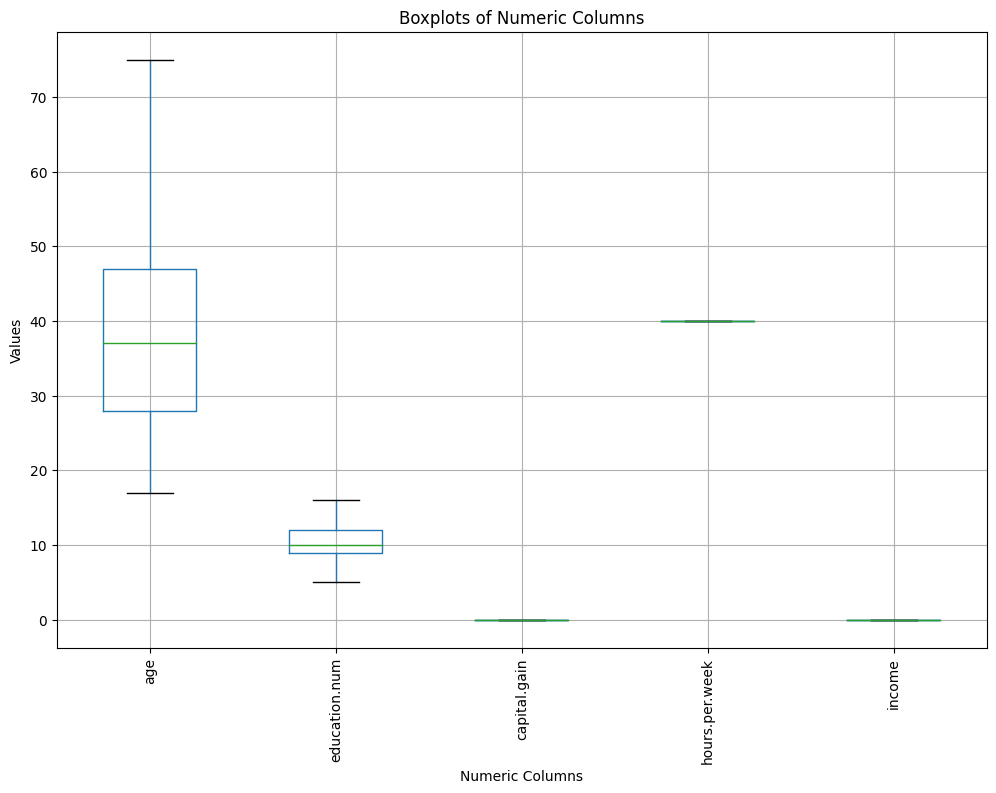

In [57]:
# Create boxplots for numerical columns
plt.figure(figsize=(12, 8))
data[numeric_features].boxplot(rot=90)
plt.title('Boxplots of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.show()

In [59]:
from sklearn.preprocessing import PowerTransformer
# Handling skewness
for col in variables_with_high_skewness:
    # Log transformation for positively skewed variables
    if skew(data[col]) > 1:
        data[col] = np.log1p(data[col])
    # Power transformation for negatively skewed variables
    elif skew(data[col]) < -1:
        pt = PowerTransformer()
        data[col] = pt.fit_transform(data[col].values.reshape(-1, 1))



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

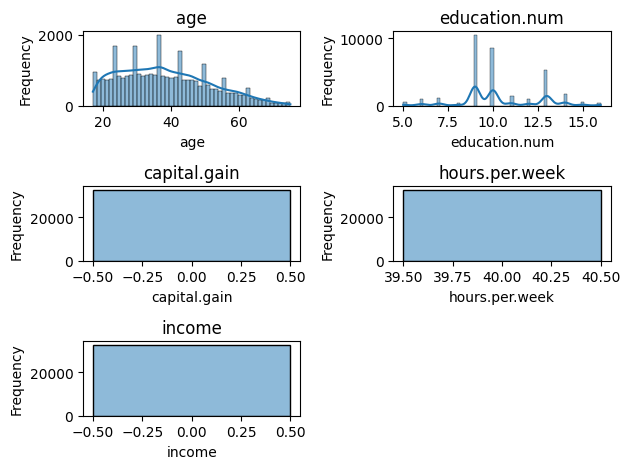

In [63]:
import math
for i, col in enumerate(numeric_features, 1):
    plt.subplot(math.ceil(len(numeric_features)/2), 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode categorical columns
for col in categorical_features:
    if col in data.columns:  # Check if column exists in DataFrame
        data[col] = label_encoder.fit_transform(data[col])

# Now, all categorical variables in the DataFrame are label encoded

In [66]:
# Set the correlation threshold
correlation_threshold = 0.7  # Adjust this threshold as needed

# Extract highly correlated variables
highly_correlated_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_vars.add(colname_i)
            highly_correlated_vars.add(colname_j)

# Convert the set to a list
highly_correlated_vars_list = list(highly_correlated_vars)

implementing the model

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [69]:
X = data.drop('income', axis=1)
y = data['income']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [73]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [75]:
y_pred=knn.predict(X_test)

In [76]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [77]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.0
R-squared: 1.0
Mean Absolute Error: 0.0
